In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ts_models

2023-05-19 05:48:08.800055: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-19 05:48:08.857002: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 05:48:09.073681: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 05:48:09.076790: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 05:48:10.699028: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

/tmp/ipykernel_4494/1912864649.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [5]:
df=pd.read_csv('data/^NSEI.csv')

In [7]:
df=df.fillna(method='bfill')

In [8]:
import tensorflow as tf

In [9]:
data=np.array(df['Open'])

#### UNIVARIATE FITTING FOR TCS SHARE PRICE FROM 2017 TO 30 JAN 2023

In [11]:
from ts_models import univariate_ts_rnn
model=univariate_ts_rnn(epochs=1000,
                        batch_size=32,
                        hidden_layers=128,
                        time_steps=30,
                       normalize=True,
                       split=0.58)

Text(0.5, 0, 'timestep')

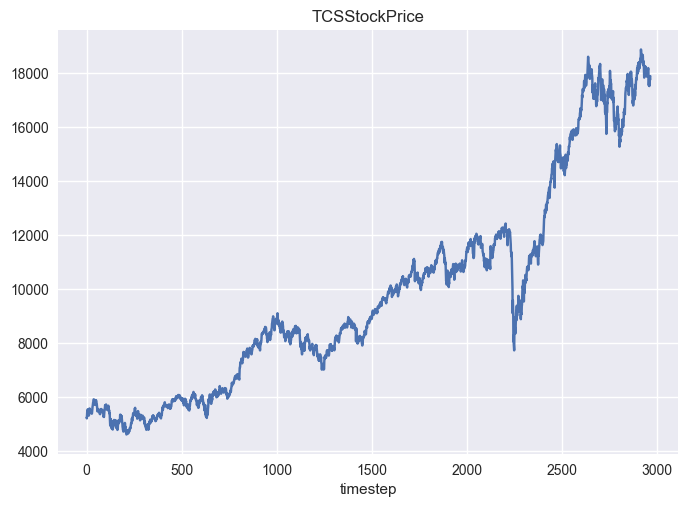

In [13]:
plt.plot(data)
plt.title('TCSStockPrice')
plt.xlabel('timestep')

2023-05-19 05:50:45.771764: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-19 05:50:45.771824: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: abhyuday-HP-Pavilion-Gaming-Laptop-15-dk2xxx
2023-05-19 05:50:45.771829: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: abhyuday-HP-Pavilion-Gaming-Laptop-15-dk2xxx
2023-05-19 05:50:45.771942: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 525.105.17
2023-05-19 05:50:45.771965: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  525.105.17  Release Build  (dvs-builder@U16-T02-30-1)  Tue Mar 28

Epoch 1/1000
2/2 - 1s - loss: 0.0946 - mean_absolute_percentage_error: 434.0169 - val_loss: 0.0412 - val_mean_absolute_percentage_error: 27.3876 - 925ms/epoch - 462ms/step
Epoch 2/1000
2/2 - 0s - loss: 0.0162 - mean_absolute_percentage_error: 179.8609 - val_loss: 0.0999 - val_mean_absolute_percentage_error: 39.9684 - 31ms/epoch - 16ms/step
Epoch 3/1000
2/2 - 0s - loss: 0.0034 - mean_absolute_percentage_error: 97.1934 - val_loss: 0.1245 - val_mean_absolute_percentage_error: 46.4628 - 33ms/epoch - 16ms/step
Epoch 4/1000
2/2 - 0s - loss: 0.0031 - mean_absolute_percentage_error: 109.7998 - val_loss: 0.0708 - val_mean_absolute_percentage_error: 28.6339 - 35ms/epoch - 18ms/step
Epoch 5/1000
2/2 - 0s - loss: 8.4988e-04 - mean_absolute_percentage_error: 136.9564 - val_loss: 0.0452 - val_mean_absolute_percentage_error: 19.8003 - 31ms/epoch - 16ms/step
Epoch 6/1000
2/2 - 0s - loss: 0.0016 - mean_absolute_percentage_error: 152.5899 - val_loss: 0.0446 - val_mean_absolute_percentage_error: 19.9648 

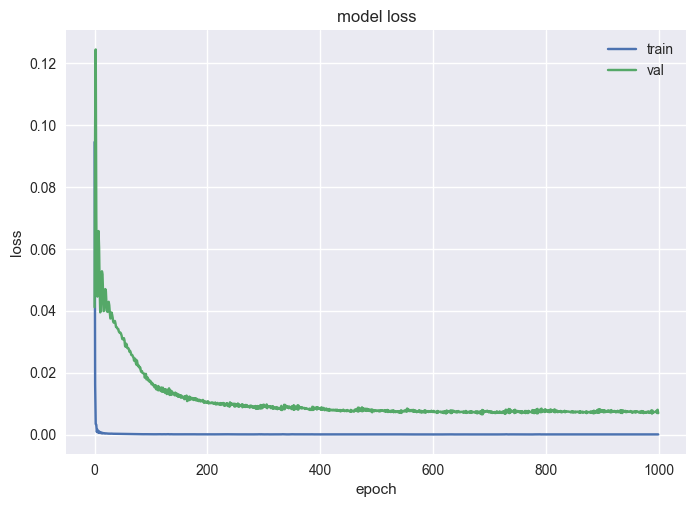

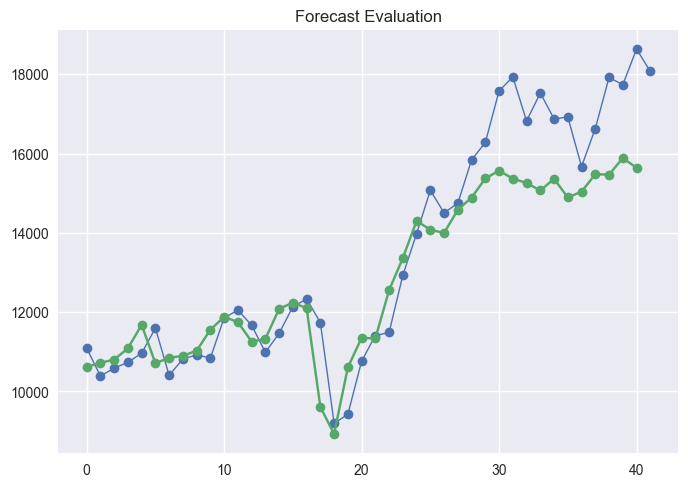

(array([[11095.599609],
        [10389.5     ],
        [10586.5     ],
        [10736.400391],
        [10963.5     ],
        [11598.75    ],
        [10405.849609],
        [10820.450195],
        [10920.849609],
        [10842.650391],
        [11856.150391],
        [12052.650391],
        [11670.75    ],
        [10987.799805],
        [11466.299805],
        [12137.049805],
        [12333.099609],
        [11738.549805],
        [ 9196.400391],
        [ 9422.200195],
        [10764.099609],
        [11409.650391],
        [11487.799805],
        [12932.5     ],
        [13980.900391],
        [15073.25    ],
        [14506.299805],
        [14749.400391],
        [15839.349609],
        [16281.349609],
        [17580.900391],
        [17935.050781],
        [16824.25    ],
        [17529.449219],
        [16876.650391],
        [16924.449219],
        [15674.25    ],
        [16632.900391],
        [17923.349609],
        [17736.349609],
        [18638.849609],
        [18074.3

In [14]:
model.train(data=data)

#### MULTIVARIATE TIME SERIES FORECASTING FOR NFLX, AMZ,DPZ

In [2]:
from ts_models import multivariate_ts_lstm

2023-05-20 14:02:43.895213: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-20 14:02:43.922070: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-20 14:02:44.051867: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-20 14:02:44.052632: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 14:02:44.785329: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
model=multivariate_ts_lstm(n_past_days=21,batch_size=32)

In [4]:
import sklearn
import pandas as pd
import numpy as np
data=pd.read_csv('data/portfolio_data.csv')[['AMZN','NFLX','DPZ']]
data=sklearn.preprocessing.MinMaxScaler().fit_transform(data)
data=np.array(data)

In [5]:
data

array([[0.        , 0.00244266, 0.        ],
       [0.00241169, 0.00302215, 0.00321824],
       [0.00548211, 0.00264071, 0.00507347],
       ...,
       [0.91652336, 0.85127306, 0.91809901],
       [0.87895251, 0.81076018, 0.8999536 ],
       [0.88868853, 0.81165869, 0.89583139]])

Total number of samples in the original training data =  1140
Total number of samples in the generated data =  35


2023-05-20 14:02:53.755971: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-20 14:02:53.756048: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: abhyuday-HP-Pavilion-Gaming-Laptop-15-dk2xxx
2023-05-20 14:02:53.756055: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: abhyuday-HP-Pavilion-Gaming-Laptop-15-dk2xxx
2023-05-20 14:02:53.756225: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 525.105.17
2023-05-20 14:02:53.756253: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  525.105.17  Release Build  (dvs-builder@U16-T02-30-1)  Tue Mar 28

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 21, 50)            10800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 32)                1632      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 32,731
Trainable params: 32,731
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


/home/abhyuday/Desktop/ForecastPro-main/ts_models.py:218: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,
2023-05-20 14:02:54.298858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-20 14:02:57.622434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


35/35 - 4s - loss: 0.0191 - mean_absolute_percentage_error: 93.7295 - val_loss: 0.0382 - val_mean_absolute_percentage_error: 22.1352 - 4s/epoch - 103ms/step
Epoch 2/50
35/35 - 1s - loss: 0.0028 - mean_absolute_percentage_error: 73.8174 - val_loss: 0.2574 - val_mean_absolute_percentage_error: 45.9668 - 687ms/epoch - 20ms/step
Epoch 3/50
35/35 - 1s - loss: 0.0012 - mean_absolute_percentage_error: 36.2644 - val_loss: 0.0430 - val_mean_absolute_percentage_error: 18.9935 - 633ms/epoch - 18ms/step
Epoch 4/50
35/35 - 1s - loss: 0.0011 - mean_absolute_percentage_error: 26.3581 - val_loss: 0.0215 - val_mean_absolute_percentage_error: 14.8982 - 544ms/epoch - 16ms/step
Epoch 5/50
35/35 - 1s - loss: 0.0011 - mean_absolute_percentage_error: 29.6405 - val_loss: 0.0199 - val_mean_absolute_percentage_error: 15.5290 - 647ms/epoch - 18ms/step
Epoch 6/50
35/35 - 1s - loss: 0.0022 - mean_absolute_percentage_error: 31.3819 - val_loss: 0.0397 - val_mean_absolute_percentage_error: 20.7230 - 771ms/epoch - 22m

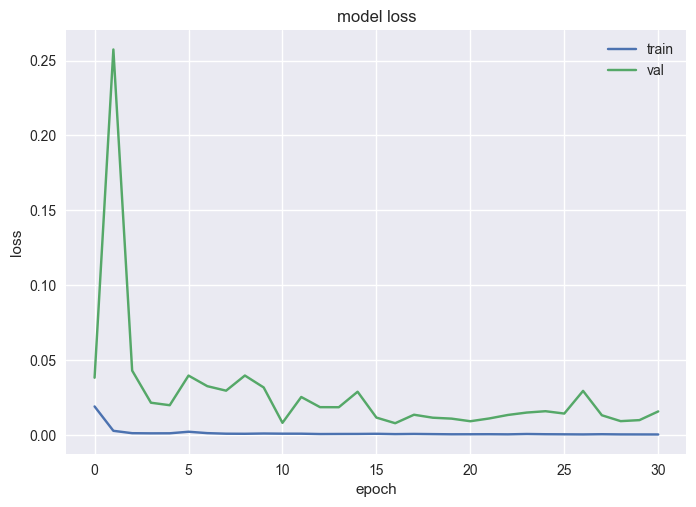

2023-05-20 14:03:18.384616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


12/12 [==============================] - 0s 6ms/step


In [6]:
test,predictions=model.train_predict(data)

In [9]:
test.shape

(380, 3)

In [10]:
predictions.shape

(359, 3)

In [1]:
print(predictions.length())

NameError: name 'predictions' is not defined

In [23]:
print(type(predictions))

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Stock')

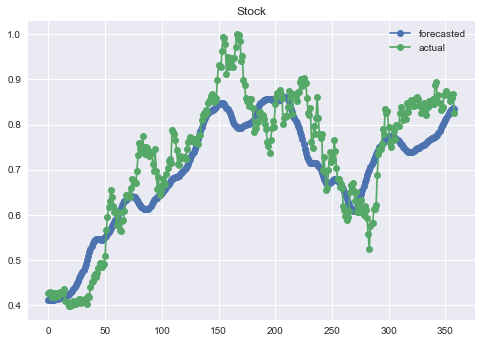

In [30]:
import matplotlib.pyplot as plt
temp_df=pd.concat([pd.DataFrame(predictions[:,1]),pd.DataFrame(test[:len(predictions),1])],axis=1)
temp_df.plot(linewidth=1.7,marker = 'o')
plt.legend(['forecasted','actual'])
plt.title('Stock')

Text(0.5, 1.0, 'Relative Error Density')

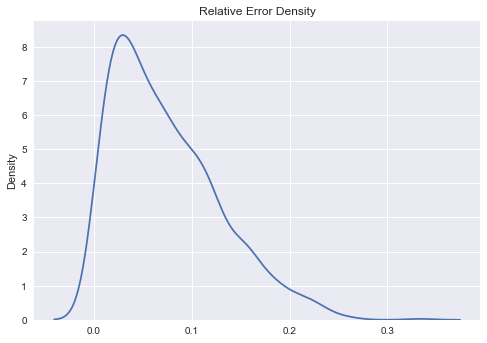

In [31]:
import seaborn as sns
import numpy as np
sns.kdeplot(np.abs((test[:len(predictions)]-predictions).flatten()/(test[:len(predictions)]).flatten()))
plt.title('Relative Error Density')

In [32]:
(test[:len(predictions)]-predictions).flatten().mean()

-0.008829427746121296